In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 4.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=91ebff8949172d071287b2f1a76f2e540a7d4188d7c11f5c406fa10b8a1057aa
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
import contextlib
from google.colab import files
import io

with contextlib.redirect_stdout(io.StringIO()):
    files.upload()

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

! unzip /content/fake-and-real-news-dataset.zip -d data

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 81% 33.0M/41.0M [00:00<00:00, 93.0MB/s]
100% 41.0M/41.0M [00:00<00:00, 106MB/s] 


In [7]:
import pandas as pd
import numpy as np

In [10]:
## EDA

fake_data = pd.read_csv('/content/data/Fake.csv')
true_data = pd.read_csv('/content/data/True.csv')

In [11]:
print("Fake Data : ")
fake_data.head()

Fake Data : 


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
print("True Data : ")
true_data.head()

True Data : 


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
# Control Volume
print("Total Number of True News Data Points : ", true_data.shape)
print("Total Number of Fake News Data Points : ", fake_data.shape)

Total Number of True News Data Points :  (21417, 4)
Total Number of Fake News Data Points :  (23481, 4)


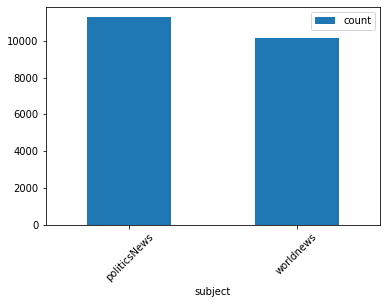

In [52]:
# Data points vs Subject

true_data.groupby('subject').size().reset_index(name = 'count').plot.bar(x='subject', y='count', rot = 45)

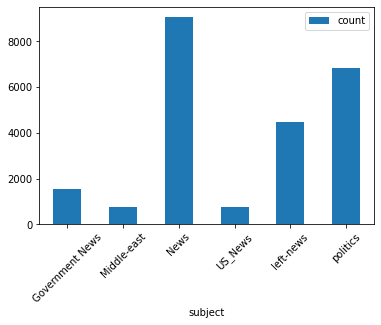

In [53]:
fake_data.groupby('subject').size().reset_index(name = 'count').plot.bar(x='subject', y='count', rot = 45)

Fake Data has more subjects than True Data. Moreover, the subject in the Fake Data seems like it's sub-categories of subject in the True Data

In [ ]:
# Date Ranges of the data
true_data['date'] = pd.to_datetime(true_data['date'], format = "%B %d, %Y ")
true_data['year'] = true_data['date'].dt.year
true_data['month'] = true_data['date'].dt.month

fake_data['date'] = pd.to_datetime(fake_data['date'], format = "%B %d, %Y")
fake_data['year'] = fake_data['date'].dt.year
fake_data['month'] = fake_data['date'].dt.month

print(f"True Data ranges from {true_data['date'].min} to {true_data['date'].max}")

In [72]:
# Data volume per day?

# true_data['date'] = pd.to_datetime(true_data['date'], format = "%B %d, %Y ")
# true_data['year'] = true_data['date'].dt.year
# true_data['month'] = true_data['date'].dt.month

# true_data.groupby(['year', 'month']).size()

sorted(fake_data['date'].unique())

['14-Feb-18',
 '15-Feb-18',
 '16-Feb-18',
 '17-Feb-18',
 '18-Feb-18',
 '19-Feb-18',
 'Apr 1, 2015',
 'Apr 1, 2016',
 'Apr 1, 2017',
 'Apr 10, 2015',
 'Apr 10, 2016',
 'Apr 10, 2017',
 'Apr 11, 2015',
 'Apr 11, 2016',
 'Apr 11, 2017',
 'Apr 12, 2015',
 'Apr 12, 2016',
 'Apr 12, 2017',
 'Apr 13, 2015',
 'Apr 13, 2016',
 'Apr 13, 2017',
 'Apr 14, 2015',
 'Apr 14, 2016',
 'Apr 14, 2017',
 'Apr 15, 2015',
 'Apr 15, 2016',
 'Apr 15, 2017',
 'Apr 16, 2015',
 'Apr 16, 2016',
 'Apr 16, 2017',
 'Apr 17, 2015',
 'Apr 17, 2016',
 'Apr 17, 2017',
 'Apr 18, 2015',
 'Apr 18, 2016',
 'Apr 18, 2017',
 'Apr 19, 2015',
 'Apr 19, 2016',
 'Apr 19, 2017',
 'Apr 2, 2015',
 'Apr 2, 2016',
 'Apr 2, 2017',
 'Apr 20, 2015',
 'Apr 20, 2016',
 'Apr 20, 2017',
 'Apr 21, 2015',
 'Apr 21, 2016',
 'Apr 21, 2017',
 'Apr 22, 2015',
 'Apr 22, 2016',
 'Apr 22, 2017',
 'Apr 23, 2015',
 'Apr 23, 2016',
 'Apr 23, 2017',
 'Apr 24, 2015',
 'Apr 24, 2016',
 'Apr 24, 2017',
 'Apr 25, 2015',
 'Apr 25, 2016',
 'Apr 25, 2017',
 'Ap